In [28]:
import re
import numpy as np
from typing import Iterable
from sklearn.base import TransformerMixin
from tqdm import tqdm

class TypeTokenRatioTransformer(TransformerMixin):
    
    def __init__(self, tokenizer: callable = None, lower: bool = True, verbose: int = 0):
        super().__init__()
        if tokenizer:
            self.tokenizer = tokenizer
        else:
            self.tokenizer = lambda s: re.findall(r'\w+', s)
        self.lower = lower
        self.verbose = verbose
    
    def fit(self, X: Iterable[str], y=None):
        return self
    
    def transform(self, X: Iterable[str], y=None):
        Xt = []
        X = tqdm(X) if self.verbose else X
        for x in X:
            x = x.lower() if self.lower else x
            tokens = self.tokenizer(x)
            types = set(tokens)
            Xt.append(len(types) / len(tokens))
        return np.asarray(Xt)
            

In [26]:
import numpy as np
import spacy
from typing import Iterable
from sklearn.base import TransformerMixin
from tqdm import tqdm

class MeanSentenceLengthTransformer(TransformerMixin):
    
    def __init__(self, spacy_model: str = 'de_core_news_sm', verbose: int = 0):
        super().__init__()
        self.nlp = spacy.load(spacy_model)
        self.verbose = verbose
        
    def fit(self, X: Iterable[str], y=None):
        return self
    
    def transform(self, X: Iterable[str], y=None):
        Xt = []
        X = tqdm(X) if self.verbose else X
        for x in X:
            doc = self.nlp(x)
            sentence_lengths = [len(sent) for sent in doc.sents]
            Xt.append(np.mean(sentence_lengths))
        return np.asarray(Xt)

In [28]:
import pandas as pd

df = pd.read_csv('../dataset/movies.csv')
#df.dropna(subset=['genre'], inplace=True)

In [68]:
import re
import langid

df['originalTitleLang'] = [langid.classify(re.sub(r'\d+', '', title))[0] for title in df.originalTitle]

In [29]:
ttr = TypeTokenRatioTransformer(verbose=1).fit_transform(df.text)

100%|██████████| 3729/3729 [00:10<00:00, 364.35it/s]


In [ ]:
import matplotlib.pyplot as plt

plt.hist(ttr, bins=200)
plt.show()

In [27]:
msl = MeanSentenceLengthTransformer(verbose=1).fit_transform(df.text)

100%|██████████| 3729/3729 [1:13:35<00:00,  1.18s/it]


In [70]:

df.to_csv('../dataset/movies.csv')

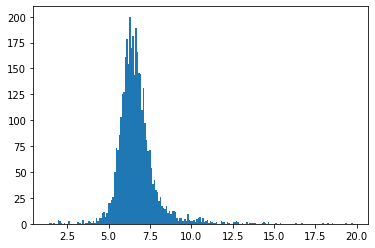

In [31]:
import matplotlib.pyplot as plt

plt.hist(msl, bins=200)
plt.show()

In [21]:
df = df[df.text_length > 1000]

In [25]:
single_genre = ['blue' if len(entry) == 1 else 'yellow' for entry in df.genre.str.split(',')]

In [26]:
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler

text_data = [
    f'{row.originalTitle}|{row.genre}|{row.production_region}|'
    f'{row.runtimeMinutes}|{row.writers}|{row.directors}|'
    f'{row.year}|{row.text_length}|{index}'
    for index, row in df.iterrows()
]

x = df.type_token_ratio
y = df.mean_sentence_length

fig = go.Figure(data=go.Scatter(x=x,
                                y=y,
                                mode='markers',
                                marker_color=single_genre,
                                text=text_data))


fig.show()

In [34]:
df.originalTitle.isna().any()

False

In [63]:
df.originalTitleLang

0            fr
1            sv
2            fr
3            tn
4            ha
         ...   
3724    UNKNOWN
3725    UNKNOWN
3726    UNKNOWN
3727    UNKNOWN
3728    UNKNOWN
Name: originalTitleLang, Length: 3729, dtype: object

[Text(0, 0, 'fr'),
 Text(0, 0, 'de'),
 Text(0, 0, 'en'),
 Text(0, 0, 'ro'),
 Text(0, 0, 'id'),
 Text(0, 0, 'it'),
 Text(0, 0, 'eu'),
 Text(0, 0, 'mg'),
 Text(0, 0, 'mt'),
 Text(0, 0, 'es'),
 Text(0, 0, 'lv'),
 Text(0, 0, 'da'),
 Text(0, 0, 'no'),
 Text(0, 0, 'pl'),
 Text(0, 0, 'is'),
 Text(0, 0, 'sk'),
 Text(0, 0, 'pt'),
 Text(0, 0, 'sv'),
 Text(0, 0, 'cy'),
 Text(0, 0, 'tl'),
 Text(0, 0, 'lt'),
 Text(0, 0, 'eo'),
 Text(0, 0, 'zh'),
 Text(0, 0, 'nb'),
 Text(0, 0, 'nl'),
 Text(0, 0, 'wa'),
 Text(0, 0, 'tr'),
 Text(0, 0, 'et'),
 Text(0, 0, 'sw'),
 Text(0, 0, 'fi'),
 Text(0, 0, 'ms'),
 Text(0, 0, 'sq'),
 Text(0, 0, 'la'),
 Text(0, 0, 'hu'),
 Text(0, 0, 'ht'),
 Text(0, 0, 'hr'),
 Text(0, 0, 'sl'),
 Text(0, 0, 'vo'),
 Text(0, 0, 'oc'),
 Text(0, 0, 'gl'),
 Text(0, 0, 'vi'),
 Text(0, 0, 'lb'),
 Text(0, 0, 'br'),
 Text(0, 0, 'rw'),
 Text(0, 0, 'az'),
 Text(0, 0, 'xh'),
 Text(0, 0, 'nn'),
 Text(0, 0, 'an'),
 Text(0, 0, 'qu'),
 Text(0, 0, 'ca'),
 Text(0, 0, 'cs'),
 Text(0, 0, 'ga'),
 Text(0, 0, 

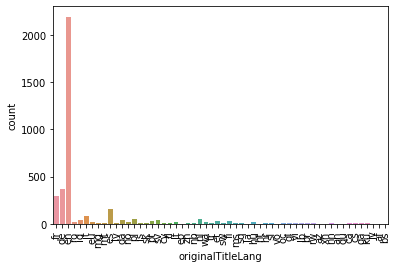

In [69]:
from collections import Counter
import seaborn as sns

lang_freqs = Counter(df.originalTitleLang)
g = sns.countplot(x='originalTitleLang', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [54]:
df.primaryTitle

0       The Count of Monte Cristo - Part 2: Retribution
1                           Hände hoch oder ich schieße
2                                La lune avec les dents
3                                         Brawl Busters
4                            Sûpâ gun redei Wani Bunsho
                             ...                       
3724                                             Blame!
3725                                            Take Me
3726                                 Get Me Roger Stone
3727                                        Lucid Dream
3728                                       CounterPunch
Name: primaryTitle, Length: 3729, dtype: object

In [55]:
df.originalTitle

0       Le comte de Monte Cristo, 2ème époque: Le chât...
1                             Hände hoch oder ich schieße
2                                  La lune avec les dents
3                                    Sa-dae-tong-iue-moon
4                              Sûpâ gun redei Wani Bunsho
                              ...                        
3724                                               Blame!
3725                                              Take Me
3726                                   Get Me Roger Stone
3727                                      Loosideu deurim
3728                                         CounterPunch
Name: originalTitle, Length: 3729, dtype: object